# **신용카드 사용자 연체 예측 AI 경진대회**

---



※※ 변경사항 ※※

1.   pycaret 연습
2.   데이터 전처리를 하지 않은 원본 train, test 파일 사용
3.   처음부터 원본데이터에서 train/test를 나눠버리는 바람에 결과가 안좋습니다. 감안해서 봐주세요 
4.   5개의 모델을 만든 후 합친(?) 걸로 결과를 낸 것입니다.
5.   각자의 모델로 만들 수 있어요



# **0. 라이브러리 설치 및 불러오기**

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, add, concatenate
from keras.layers import Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers import LSTM
from keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
from keras.preprocessing import text, sequence
from keras.callbacks import LearningRateScheduler
from keras.optimizers import RMSprop, Adadelta, Adam
from sklearn import preprocessing
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
import random
import glob
import missingno as msno
from sklearn.svm import SVC
import warnings

from tensorflow.keras.utils import to_categorical


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.chdir('/content/drive/MyDrive/data/credit')

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

In [6]:
df_train=train.copy()
df_test=test.copy()

# **pycaret 연습** 







In [7]:
pip install pycaret

     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 645kB 21.9MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [8]:
from pycaret.utils import version
version()

'2.3.1'

In [9]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


setup

In [10]:
from pycaret.regression import *
from pycaret.utils import check_metric
from sklearn.impute import SimpleImputer
exp1 = setup(train, target = 'credit',ignore_features=['index'])

,Description,Value
0,session_id,4480
1,Target,credit
2,Original Data,"(26457, 20)"
3,Missing Values,True
4,Numeric Features,5
5,Categorical Features,13
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(18519, 60)"


compare model

In [11]:
compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.5101,0.4299,0.6555,0.1181,0.3418,0.2610,3.960
lightgbm,Light Gradient Boosting Machine,0.5420,0.4299,0.6556,0.1180,0.3480,0.2741,0.196
gbr,Gradient Boosting Regressor,0.5596,0.4443,0.6665,0.0884,0.3536,0.2825,1.066
ada,AdaBoost Regressor,0.5939,0.4604,0.6785,0.0551,0.3539,0.2998,0.102
br,Bayesian Ridge,0.5941,0.4773,0.6908,0.0206,0.3633,0.3011,0.064
omp,Orthogonal Matching Pursuit,0.5936,0.4775,0.6910,0.0202,0.3633,0.3009,0.034
ridge,Ridge Regression,0.5922,0.4775,0.6910,0.0201,0.3632,0.2997,0.038
en,Elastic Net,0.5993,0.4783,0.6915,0.0185,0.3638,0.3052,0.036
lr,Linear Regression,0.5922,0.4790,0.6920,0.0172,0.3635,0.2998,0.452
lasso,Lasso Regression,0.6046,0.4811,0.6936,0.0128,0.3646,0.3092,0.038


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=4480, verbose=0, warm_start=False)

In [12]:
top5 = compare_models(sort='RMSE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.5049,0.4266,0.6530,0.1247,0.3406,0.2585,4.491
lightgbm,Light Gradient Boosting Machine,0.5409,0.4278,0.6540,0.1221,0.3475,0.2733,0.097
gbr,Gradient Boosting Regressor,0.5591,0.4437,0.6660,0.0894,0.3534,0.2822,0.962
ada,AdaBoost Regressor,0.5887,0.4573,0.6761,0.0617,0.3536,0.2972,0.099
omp,Orthogonal Matching Pursuit,0.5933,0.4773,0.6907,0.0206,0.3632,0.3007,0.025
br,Bayesian Ridge,0.5940,0.4773,0.6908,0.0205,0.3632,0.3011,0.054
ridge,Ridge Regression,0.5923,0.4777,0.6911,0.0196,0.3633,0.2998,0.023
en,Elastic Net,0.5993,0.4782,0.6914,0.0186,0.3637,0.3052,0.024
lr,Linear Regression,0.5924,0.4801,0.6928,0.0148,0.3637,0.2999,0.030
et,Extra Trees Regressor,0.5047,0.4809,0.6932,0.0131,0.3597,0.2617,3.639


create model

In [13]:
rf = create_model('rf', fold=5)
lightgbm = create_model('lightgbm', fold=5)
gbr = create_model('gbr', fold=5)
ada = create_model('ada', fold=5)
omp = create_model('omp', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5906,0.4726,0.6874,0.0211,0.3609,0.3019
1,0.5854,0.4591,0.6776,0.0269,0.3539,0.2994
2,0.5945,0.4806,0.6933,0.0143,0.3643,0.3013
3,0.5961,0.4811,0.6936,0.0156,0.3646,0.3019
4,0.6014,0.4943,0.7030,0.0230,0.3728,0.2999
Mean,0.5936,0.4775,0.6910,0.0202,0.3633,0.3009
SD,0.0054,0.0115,0.0084,0.0047,0.0062,0.0011


tune model

In [14]:
tuned_top5 = [tune_model(i) for i in top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5824,0.4603,0.6784,0.0316,0.3556,0.3013
1,0.5981,0.4861,0.6972,0.0084,0.3663,0.3013
2,0.5851,0.4631,0.6805,0.0282,0.3563,0.2987
3,0.5818,0.4557,0.6751,0.0239,0.3516,0.2973
4,0.5842,0.4627,0.6802,0.0164,0.3548,0.3018
5,0.6031,0.4991,0.7064,0.0111,0.3737,0.2989
6,0.5994,0.4875,0.6982,0.0156,0.3678,0.2982
7,0.5906,0.4736,0.6882,0.0174,0.3610,0.3042
8,0.5955,0.4832,0.6951,0.0207,0.3664,0.2985
9,0.6048,0.5065,0.7117,0.0220,0.3795,0.2988


ensemble model

blend models

In [15]:
blender_top5 = blend_models(tuned_top5, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5564,0.4392,0.6627,0.0902,0.3515,0.2760
1,0.5547,0.4278,0.6541,0.0931,0.3449,0.2771
2,0.5653,0.4515,0.6719,0.0741,0.3567,0.2801
3,0.5646,0.4474,0.6689,0.0844,0.3553,0.2809
4,0.5699,0.4612,0.6791,0.0884,0.3634,0.2775
Mean,0.5622,0.4454,0.6674,0.0860,0.3544,0.2783
SD,0.0058,0.0113,0.0085,0.0066,0.0061,0.0019


stack models

In [16]:
stacked_models = stack_models(estimator_list=[rf, lightgbm, gbr, ada, omp])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5033,0.3884,0.6232,0.1828,0.3296,0.2583
1,0.5164,0.4148,0.6440,0.1539,0.3428,0.2592
2,0.4971,0.3907,0.6250,0.1803,0.3334,0.2523
3,0.4959,0.3883,0.6232,0.1682,0.3285,0.2511
4,0.5196,0.4149,0.6442,0.1180,0.3385,0.2678
5,0.5244,0.4250,0.6519,0.1578,0.3492,0.2600
6,0.5197,0.4172,0.6459,0.1576,0.3444,0.2613
7,0.5085,0.4103,0.6406,0.1487,0.3412,0.2637
8,0.5208,0.4222,0.6498,0.1442,0.3452,0.2588
9,0.5379,0.4506,0.6713,0.1300,0.3589,0.2650


create stacknet

plot model

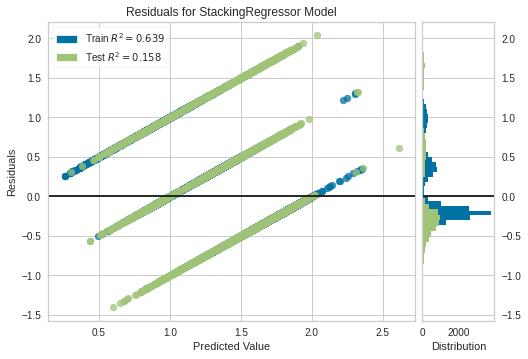

In [18]:
plot_model(stacked_models)

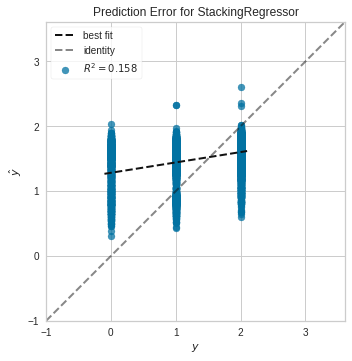

In [19]:
plot_model(stacked_models, plot='error')

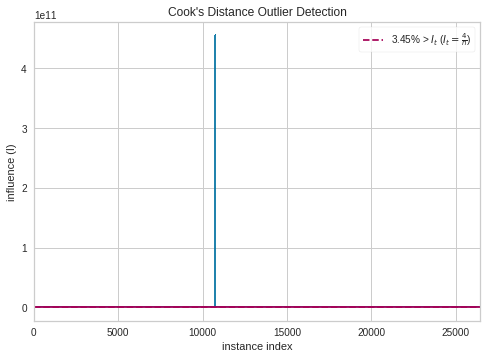

In [20]:
plot_model(stacked_models, plot='cooks')

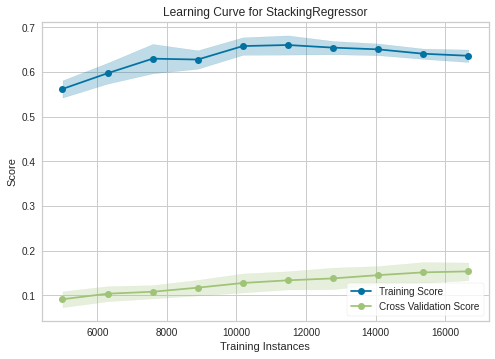

In [22]:
plot_model(stacked_models, plot='learning')

In [26]:
plot_model(stacked_models, plot='parameter')

,Parameters
cv,"KFold(n_splits=10, random_state=RandomState(MT..."
estimators,"[('rf', RandomForestRegressor(bootstrap=True, ..."
final_estimator,"LinearRegression(copy_X=True, fit_intercept=Tr..."
n_jobs,-1
passthrough,True
verbose,0


evaluate model

In [29]:
evaluate_model(stacked_models)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interpret model

finalize model

In [30]:
final_model = finalize_model(stacked_models)

predict model

In [44]:
prediction = predict_model(final_model, data=train)
prediction.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,Label
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,1.282897
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,0.898123
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1.603990
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,1.062242
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,1.688655


평가

In [48]:
from pycaret.utils import check_metric
check_metric(prediction['credit'], prediction['Label'], metric = 'R2')

0.6348

In [49]:
from pycaret.utils import check_metric
check_metric(prediction['credit'], prediction['Label'], metric = 'MAE')

0.339

In [50]:
from pycaret.utils import check_metric
check_metric(prediction['credit'], prediction['Label'], metric = 'RMSE')

0.1801

In [52]:
from pycaret.utils import check_metric
check_metric(prediction['credit'], prediction['Label'], metric = 'RMSLE')

0.2495

In [53]:
from pycaret.utils import check_metric
check_metric(prediction['credit'], prediction['Label'], metric = 'MAPE')

0.1716